# <span style="color:#FFC72C;"> Project 2 : Movie Recommendation System with Demographic and Content-Based Filtering<span/>

*The primary objective of this project is to create an advanced movie recommendation system that combines Demographic Filtering, Content-Based Filtering, and a Weighted Rating mechanism based on the IMDB formula. The goal is to provide users with highly personalized movie recommendations by considering their demographic information, individual preferences, and incorporating a reliable rating system.*

*Key Objectives:*
- *Implement demographic filtering algorithms to understand user preferences based on age, gender, and other demographic factors.*
- *Develop content-based filtering mechanisms that analyze movie features and generate recommendations tailored to individual user preferences.*
- *Incorporate the IMDB Weighted Rating formula to prioritize movies with higher average ratings and a substantial number of votes.*
- *Evaluate the recommendation system's performance through metrics such as precision, recall, and user satisfaction.*
- *Create an intuitive and interactive Jupyter Notebook interface for users to explore and test the recommendation system.*

*The successful completion of this project will result in a comprehensive movie recommendation system that seamlessly integrates demographic and content-based filtering, enriched by the reliability of the IMDB Weighted Rating formula. Users will benefit from a personalized and high-quality movie-watching experience tailored to their unique preferences.*

In [1]:
import ast
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

Loading Dataset from : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download

In [2]:
movie_detailed_info = pd.read_csv("tmdb_5000_movies.csv")
movie_info = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movie_info.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movie_detailed_info.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


<h2> <span style="color:#8C1D40;"> Data Enrichment </span></h2> 


Combining datasets to create a unified dataset through merging. This process involves merging multiple datasets into a single, comprehensive dataset.

In [5]:
merged_df = pd.merge(left=movie_info, right=movie_detailed_info, left_on='movie_id', right_on='id', how='inner')

In [6]:
merged_df.shape[0] 

4803

In [7]:
merged_df.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<h2><span style="color:#8C1D40;">Data Cleaning </span></h2> 

In [8]:
merged_df.drop_duplicates(inplace=True)

In [9]:
merged_df.drop("id",axis=1,inplace=True)

Verifying that the titles do not match.

In [10]:
merged_df[merged_df["title_x"]!=merged_df["title_y"]]

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count


In [11]:
merged_df.drop("title_y", inplace=True, axis=1)
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

In [12]:
merged_df[merged_df["title"]!=merged_df["original_title"]][["original_language","title","original_title"]].head(5)

,original_language,title,original_title
97,ja,Shin Godzilla,シン・ゴジラ
215,en,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,fr,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,zh,The Flowers of War,金陵十三釵
474,fr,Evolution,Évolution


In [13]:
merged_df[(merged_df["title"]!=merged_df["original_title"])&(merged_df["original_language"]=='en')][
    ["original_language","title","original_title"]].head(5)

,original_language,title,original_title
215,en,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
488,en,Arthur and the Invisibles,Arthur et les Minimoys
561,en,Two Brothers,Deux frères
719,en,This Is It,Michael Jackson's This Is It
1255,en,The Impossible,Lo imposible


Based on the output from the previous two cells, it's evident that the "original_title" column won't contribute significantly to our analysis, especially considering that we're focusing on English language content. Therefore, we can safely remove this column. Similarly, the "homepage" column doesn't provide additional value to the analysis, so we can drop it as well.

In [14]:
merged_df.drop(columns=["original_title","homepage"],inplace=True, axis=1)

In [15]:
movies_df=merged_df.copy()

-> Before making any changes to the data, let's take a closer look at how the information is currently structured in these columns. We'll then visualize the expected format after the modifications are applied.

In [16]:
ast.literal_eval(movies_df["spoken_languages"][0]) 

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [17]:
list(set([i["name"] for i in ast.literal_eval(movies_df["spoken_languages"][0])][:10]))

['Español', 'English']

In [18]:
def get_first_10_names(row):
    row_list = ast.literal_eval(row)
    first_10_unique_names = set([i["name"] for i in row_list][:10])
    first_10_names = ", ".join(f"{name.replace(' ', '')}" for name in first_10_unique_names)
    return first_10_names

movies_df['cast'] = movies_df['cast'].apply(get_first_10_names)
movies_df['crew'] = movies_df['crew'].apply(get_first_10_names)
movies_df['genres'] = movies_df['genres'].apply(get_first_10_names)
movies_df['keywords'] = movies_df['keywords'].apply(get_first_10_names)
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(get_first_10_names)
movies_df['production_companies'] = movies_df['production_companies'].apply(get_first_10_names)
movies_df['production_countries'] = movies_df['production_countries'].apply(get_first_10_names)

<h1> <span style="color:#8C1D40;"> Movie Recommendation System : Based on popularity </span></h1>

In [19]:
movies_df.head(11)

,movie_id,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"CCHPounder, LazAlonso, GiovanniRibisi, Stephen...","RickCarter, JamesHorner, MaliFinn, JamesCamero...",237000000,"Action, ScienceFiction, Fantasy, Adventure","spacecolony, future, spacewar, space, alien, c...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"IngeniousFilmPartners, TwentiethCenturyFoxFilm...","UnitedStatesofAmerica, UnitedKingdom",2009-12-10,2787965087,162.0,"Español, English",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"JackDavenport, KeiraKnightley, StellanSkarsgår...","TerryRossio, HansZimmer, MikeStenson, EricMcLe...",300000000,"Adventure, Action, Fantasy","shipwreck, alliance, drugabuse, exoticisland, ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"SecondMateProductions, JerryBruckheimerFilms, ...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"LéaSeydoux, BenWhishaw, DaveBautista, RalphFie...","BillBernstein, AnnaPinnock, SamMendes, JohnLog...",245000000,"Action, Crime, Adventure","unitedkingdom, britishsecretservice, mi6, base...",en,A cryptic message from Bond’s past sends him o...,107.376788,"ColumbiaPictures, Danjaq, B24","UnitedStatesofAmerica, UnitedKingdom",2015-10-26,880674609,148.0,"Deutsch, Español, Italiano, English, Français",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"AnneHathaway, CillianMurphy, MorganFreeman, Ju...","HansZimmer, WallyPfister, JonathanNolan, Charl...",250000000,"Drama, Action, Crime, Thriller","gothamcity, secretidentity, vigilante, timebom...",en,Following the death of District Attorney Harve...,112.312950,"WarnerBros., Syncopy, LegendaryPictures, DCEnt...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,7.6,9106
4,49529,John Carter,"MarkStrong, JamesPurefoy, LynnCollins, Dominic...","JuanPeralta, JohnLasseter, AndrewStanton, Mich...",260000000,"Action, ScienceFiction, Adventure","martian, escape, medallion, basedonnovel, alie...",en,"John Carter is a war-weary, former military ca...",43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",6.1,2124
5,559,Spider-Man 3,"ThomasHadenChurch, JamesFranco, TobeyMaguire, ...","SamRaimi, SteveDitko, JosephM.CaraccioloJr., S...",258000000,"Fantasy, Action, Adventure","loveofone'slife, wretch, sand, deathofafriend,...",en,The seemingly invincible Spider-Man goes up ag...,115.699814,"ColumbiaPictures, LauraZiskinProductions, Marv...",UnitedStatesofAmerica,2007-05-01,890871626,139.0,"Français, English",Released,The battle within.,5.9,3576
6,38757,Tangled,"RichardKiel, PaulF.Tompkins, ZacharyLevi, M.C....","JohnLasseter, RoyConli, MarkKennedy, AlanMenke...",260000000,"Animation, Family","hostage, selfishness, blondewoman, animation, ...",en,When the kingdom's most wanted-and most charmi...,48.681969,"WaltDisneyAnimationStudios, WaltDisneyPictures",UnitedStatesofAmerica,2010-11-24,591794936,100.0,English,Released,They're taking adventure to new lengths.,7.4,3330
7,99861,Avengers: Age of Ultron,"AaronTaylor-Johnson, JamesSpader, MarkRuffalo,...","DannyElfman, BrianTyler, SarahFinn, StanLee, R...",280000000,"Action, ScienceFiction, Adventure","marvelcinematicuniverse, basedoncomicbook, mar...",en,When Tony Stark tries to jumpstart a dormant p...,134.279229,"MarvelStudios, RevolutionSunStudios, PrimeFocus",UnitedStatesofAmerica,2015-04-22,1405403694,141.0,English,Released,A New Age Has Come.,7.3,6767
8,767,Harry Potter and the Half-Blood Prince,"MichaelGambon, HelenaBonhamCarter, DanielRadcl...","StephanieMcMillan, SteveKloves, GaryTomkins, D...",250000000,"Adventure, Family, Fantasy","schoolofw

1. **Visualize Popularity Distribution:**
   - Create histograms or density plots to depict the spread of movie popularity scores. This visualization aids in comprehending the distribution of popularity across the dataset.

2. **Correlation Analysis:**
   - Explore the relationship between the "popularity" column and other numerical columns like "vote_average" and "vote_count." The chart suggests that some highly popular movies may have lower ratings. Analyzing correlations helps understand whether movies with higher popularity tend to receive higher ratings or more votes.

3. **Feature Engineering:**
   - Utilize the "popularity" column as a feature in future machine learning models. Incorporating popularity as a feature can enhance the predictive capability of the models.

4. **Ranking and Filtering:**
   - Employ the "popularity" column to filter out less popular movies before creating a top "n" movies list. Alternatively, create a composite metric that combines popularity scores, providing a more comprehensive basis for ranking and filtering movies.

These analyses leverage the "popularity" column to gain insights into the distribution and relationships within the dataset, contributing to more informed decision-making and model enhancement.

First lets see the distribution of the popularity column

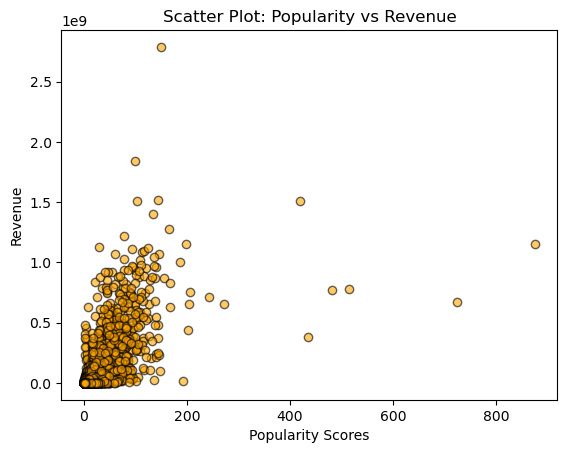

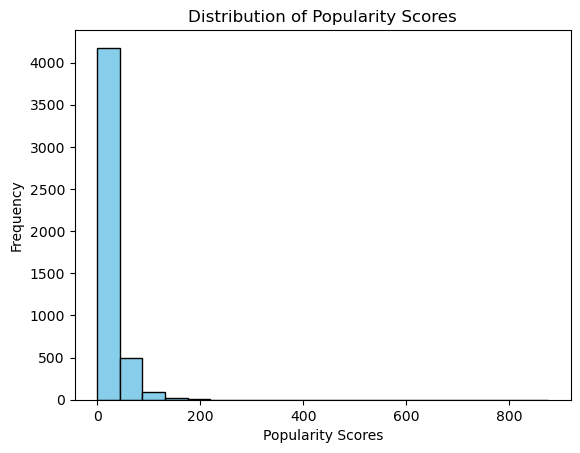

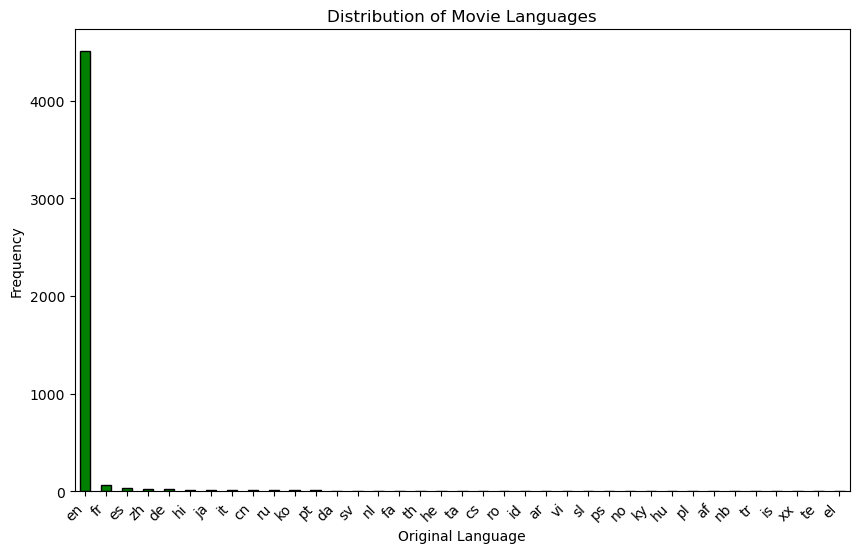

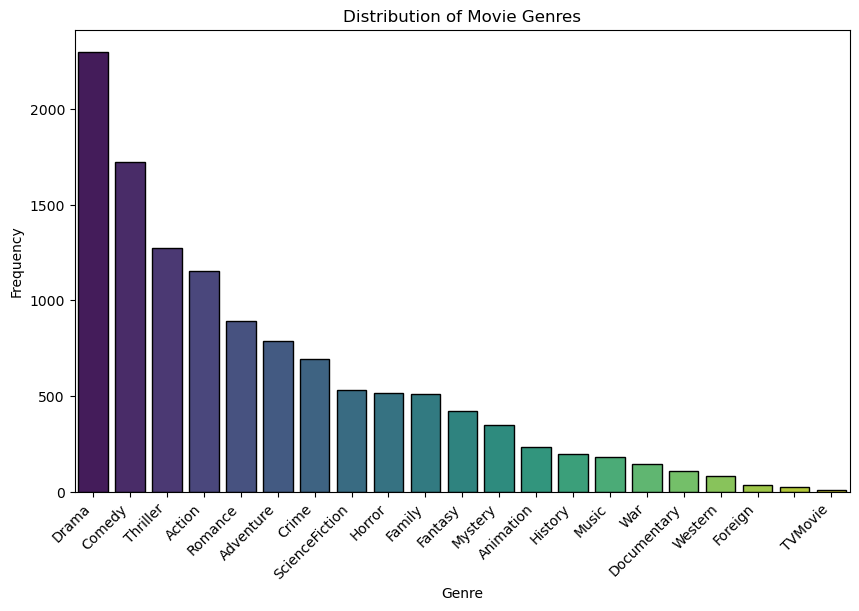

In [20]:
# Scatter plot based on Popularity vs Revenue
popularity_values = movies_df['popularity']
revenue_values = movies_df['revenue']
plt.scatter(popularity_values, revenue_values, color='orange', edgecolor='black', alpha=0.6)
plt.xlabel('Popularity Scores')
plt.ylabel('Revenue')
plt.title('Scatter Plot: Popularity vs Revenue')
plt.show()

# Histogram based on Popularity Scores
plt.hist(popularity_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')
plt.show()

# Bar plot based on Distribution of Movie Languages
plt.figure(figsize=(10, 6))
languages = movies_df['original_language']
language_counts = languages.value_counts()
language_counts.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Original Language')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Languages')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot based on Distribution of Movie Genres with color theme using Seaborn
plt.figure(figsize=(10, 6))
genres_counts = movies_df['genres'].str.split(',').explode().str.strip().value_counts()
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


Observation: The distribution of popularity scores appears to be uneven, and intriguingly, there doesn't seem to be a significant impact on the revenue generated by movies with higher popularity scores.

Additional Observations:
1. **Language Distribution:**
   - It's noteworthy that a substantial majority of movies in the dataset are in the English language. This dominance in English-language movies may influence the overall trends and patterns observed, warranting consideration in subsequent analyses.

2. **Potential Influencing Factors:**
   - While popularity scores are not uniform, it's essential to investigate other potential factors that might contribute to revenue generation. Exploring variables such as genre, production companies, and release dates could reveal additional insights into the dynamics influencing a movie's financial success.

3. **Market Dynamics:**
   - The prevalence of English-language movies might reflect broader market dynamics, indicating the global influence of English in the film industry. This dominance could impact how movies are received worldwide and influence revenue patterns.

4. **Audience Preferences:**
   - Understanding the audience's language preferences is crucial for interpreting the data accurately. Analyzing revenue trends in correlation with language could provide insights into whether certain language preferences contribute to higher revenue.

5. **Strategic Considerations:**
   - Filmmakers and studios may need to consider language-specific strategies for marketing and distribution to maximize the revenue potential of their movies, given the language composition of the dataset.

In summary, the uneven distribution of popularity scores and their seemingly limited impact on revenue highlight the need for a comprehensive exploration of various factors, including language distribution, to better understand the dynamics shaping the movie industry in this dataset.

First lets see top 5 most popular movies and vote distribution

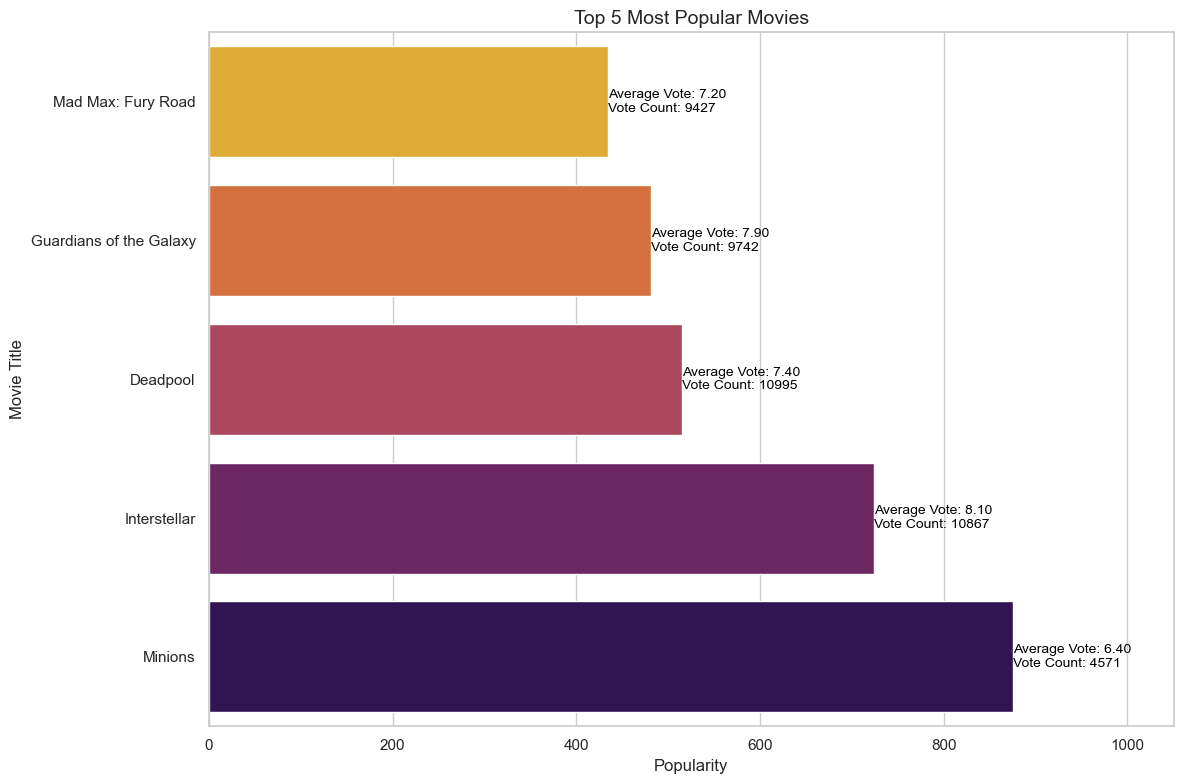

In [21]:
pop = movies_df.sort_values('popularity', ascending=False).head(5)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='popularity', y='title', data=pop, palette='inferno', dodge=False)

for bar, avg, count in zip(bars.patches, pop['vote_average'], pop['vote_count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'Average Vote: {avg:.2f}\nVote Count: {count}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 5 Most Popular Movies', fontsize=14)

plt.gca().invert_yaxis()
plt.xlim(0, max(pop['popularity']) * 1.2)
plt.tight_layout()
plt.show()


In [22]:
correlation_matrix = movies_df[['popularity', 'vote_average', 'vote_count']].corr()
correlation_matrix

,popularity,vote_average,vote_count
popularity,1.000000,0.273952,0.778130
vote_average,0.273952,1.000000,0.312997
vote_count,0.778130,0.312997,1.000000


Although popular films often garner more votes, this doesn't necessarily translate to higher average voting scores. Hence, incorporating popularity into the metric may not be prudent. We will investigate alternative columns to develop a Popularity-based recommender system.

<h3><span style="color:#8C1D40;">TMDB Top "n" Movies</span></h3>
This recommendation system suggests movies based on their overall popularity, prioritizing those with higher ratings and more votes. It is a straightforward approach suitable for new users or situations where personalized data is limited, as in our dataset.

Reference: [IMDB Top 250 Movies](https://www.imdb.com/chart/top/?ref_=nb_mv_3_chttp)

To create the same page, we will use the same metric as IMDB, which is the weighted rating. This metric provides a true Bayesian estimate of a movie's quality, taking into account both the average rating and the number of votes it has received. By using the weighted rating metric, we aim to offer users recommendations that reflect both the quality and popularity of movies.

In [23]:
v = movies_df.vote_count
R = movies_df.vote_average
C = movies_df['vote_average'].mean()
#m = Currently IMDB benchmark for m=25000 votes, let's see what will be the m value for our dataset

In [24]:
total_no_of_entry=movies_df.shape[0]
quantile_75 = movies_df['vote_count'].quantile(0.75)
quantile_80 = movies_df['vote_count'].quantile(0.8)
quantile_90 = movies_df['vote_count'].quantile(0.9)
max_vote = movies_df['vote_count'].max()

print("Total votes:",total_no_of_entry)
print("75th Quantile:", quantile_75)
print("80th Quantile:", quantile_80)
print("90th Quantile:", quantile_90)
print("maximum no of vote count:", max_vote)

Total votes: 4803
75th Quantile: 737.0
80th Quantile: 957.6000000000004
90th Quantile: 1838.4000000000015
maximum no of vote count: 13752


Upon examining the data, we observe a significant disparity between the 90th percentile and the highest number of votes. Considering this gap, we propose narrowing down the selection of top-rated movies. Rather than displaying the top 250 movies, we can focus on the top 50 movies by setting a threshold value 'm' at the 90th quantile.

In [25]:
m=quantile_90

In [26]:
movies_df['weighted_rating'] = movies_df['vote_count'] / (movies_df['vote_count'] + m) * \
                            movies_df['vote_average'] + (m / (movies_df['vote_count'] + m)) * C

print("TMDB TOP 50 MOVIES")
movies_df[["title","spoken_languages","popularity","release_date","revenue","vote_average",\
               "vote_count","weighted_rating"]].sort_values(by='weighted_rating', ascending=False).head(50)

TMDB TOP 50 MOVIES


,title,spoken_languages,popularity,release_date,revenue,vote_average,vote_count,weighted_rating
1881,The Shawshank Redemption,English,136.747729,1994-09-23,28341469,8.5,8205,8.059258
662,Fight Club,English,146.757391,1999-10-15,100853753,8.3,9413,7.939256
65,The Dark Knight,"普通话, English",187.322927,2008-07-16,1004558444,8.2,12002,7.920020
3232,Pulp Fiction,"Español, Français, English",121.463076,1994-10-08,213928762,8.3,8428,7.904645
96,Inception,"Français, 日本語, English",167.583710,2010-07-14,825532764,8.1,13752,7.863239
3337,The Godfather,"Latin, Italiano, English",143.659698,1972-03-14,245066411,8.4,5893,7.851236
95,Interstellar,English,724.247784,2014-11-05,675120017,8.1,10867,7.809479
809,Forrest Gump,English,138.133331,1994-07-06,677945399,8.2,7927,7.803188
329,The Lord of the Rings: The Return of the King,English,123.630332,2003-12-01,1118888979,8.1,8064,7.727243
1990,The Empire Strikes Back,English,78.517830,1980-05-17,538400000,8.2,5879,7.697884


The initial basic recommendation system has been implemented. However, it lacks the ability to offer highly relevant or personalized recommendations for individual users.

<h1> <span style="color:#8C1D40;"> Movie Recommendation System : Based on Content Based Filtering </span></h1>

Previously we have created a simple and generic movie recommendation list. Now we will create a recommender system which will suggest movies which user might be interested in. 

<b><span style="color:#8C1D40;">Content-Based Filtering:</b>
<ol>
<li>cast and crew: These columns contain information about the actors, directors, and other crew members involved in the movie. Content-based filtering can use this data to recommend movies similar to those with the same cast or crew members.</li>
<li>genres: Describes the genres of the movie. Content-based filtering can recommend movies based on shared genres.</li>
<li>keywords: Provides keywords or tags associated with the movie. Content-based filtering can utilize these keywords to recommend movies with similar themes or topics.</li>
<li>overview: Offers a brief summary or description of the movie. Content-based filtering can analyze the textual content of overviews to recommend movies with similar plots or themes.</li>
</ol>

<b>Note1:-</b>Columns such as 'budget', 'revenue', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', and 'tagline' are not directly suitable for content-based filtering, as they contain information about the production, release, and language aspects of the movie rather than content characteristics. We can drop these columns.

<b>Note2:-</b>'vote_count' and 'vote_average' are columns which are used in collaborative filtering but as here we do not have any user specific details we will remove them too.

In [27]:
column_list=["movie_id","budget","revenue","production_companies","production_countries","original_language",
             "release_date","runtime","spoken_languages","status","tagline",
             "popularity","vote_average","vote_count"]
movies_df.drop(columns=column_list,inplace=True,axis=1)

In [28]:
movies_df.head(11)

,title,cast,crew,genres,keywords,overview,weighted_rating
0,Avatar,"CCHPounder, LazAlonso, GiovanniRibisi, Stephen...","RickCarter, JamesHorner, MaliFinn, JamesCamero...","Action, ScienceFiction, Fantasy, Adventure","spacecolony, future, spacewar, space, alien, c...","In the 22nd century, a paraplegic Marine is di...",7.050669
1,Pirates of the Caribbean: At World's End,"JackDavenport, KeiraKnightley, StellanSkarsgår...","TerryRossio, HansZimmer, MikeStenson, EricMcLe...","Adventure, Action, Fantasy","shipwreck, alliance, drugabuse, exoticisland, ...","Captain Barbossa, long believed to be dead, ha...",6.665696
2,Spectre,"LéaSeydoux, BenWhishaw, DaveBautista, RalphFie...","BillBernstein, AnnaPinnock, SamMendes, JohnLog...","Action, Crime, Adventure","unitedkingdom, britishsecretservice, mi6, base...",A cryptic message from Bond’s past sends him o...,6.239396
3,The Dark Knight Rises,"AnneHathaway, CillianMurphy, MorganFreeman, Ju...","HansZimmer, WallyPfister, JonathanNolan, Charl...","Drama, Action, Crime, Thriller","gothamcity, secretidentity, vigilante, timebom...",Following the death of District Attorney Harve...,7.346721
4,John Carter,"MarkStrong, JamesPurefoy, LynnCollins, Dominic...","JuanPeralta, JohnLasseter, AndrewStanton, Mich...","Action, ScienceFiction, Adventure","martian, escape, medallion, basedonnovel, alie...","John Carter is a war-weary, former military ca...",6.096368
5,Spider-Man 3,"ThomasHadenChurch, JamesFranco, TobeyMaguire, ...","SamRaimi, SteveDitko, JosephM.CaraccioloJr., S...","Fantasy, Action, Adventure","loveofone'slife, wretch, sand, deathofafriend,...",The seemingly invincible Spider-Man goes up ag...,5.965250
6,Tangled,"RichardKiel, PaulF.Tompkins, ZacharyLevi, M.C....","JohnLasseter, RoyConli, MarkKennedy, AlanMenke...","Animation, Family","hostage, selfishness, blondewoman, animation, ...",When the kingdom's most wanted-and most charmi...,6.934805
7,Avengers: Age of Ultron,"AaronTaylor-Johnson, JamesSpader, MarkRuffalo,...","DannyElfman, BrianTyler, SarahFinn, StanLee, R...","Action, ScienceFiction, Adventure","marvelcinematicuniverse, basedoncomicbook, mar...",When Tony Stark tries to jumpstart a dormant p...,7.041968
8,Harry Potter and the Half-Blood Prince,"MichaelGambon, HelenaBonhamCarter, DanielRadcl...","StephanieMcMillan, SteveKloves, GaryTomkins, D...","Adventure, Family, Fantasy","schoolofwitchcraft, werewolf, magic, witch, te...","As Harry begins his sixth year at Hogwarts, he...",7.062856
9,Batman v Superman: Dawn of Justice,"ScootMcNairy, HenryCavill, BenAffleck, JesseEi...","HansZimmer, LoraKennedy, DavidS.Goyer, Charles...","Action, Fantasy, Adventure","basedoncomicbook, vigilante, dcextendedunivers...",Fearing the actions of a god-like Super Hero l...,5.781535


<h3><span style="color:#8C1D40;">Content-Based Filtering</span></h3>
<b>Steps:</b>
<ol>
    <li><b>Feature Combination:</b></li> The six features available will be merged into a consolidated text column named 'combined_features.'
    <li><b>Vectorization:</b></li> For a comprehensive understanding of movie features, text data will be converted into numerical vectors using TF-IDF vectorization. TF-IDF creates a sparse, high-dimensional feature space, making it suitable for tasks like document similarity and capturing the uniqueness of movie descriptions.
    <li><b>Similarity Measurement:</b></li> Various similarity measures exist, such as cosine similarity, Pearson correlation coefficient, Jaccard similarity, and Euclidean distance. For content-based recommendation systems and high-dimensional data, cosine similarity is particularly effective. Hence, we will employ cosine similarity with the linear kernel to calculate similarity scores between movies.
    <li><b>Recommendation Function:</b></li> A function named recommend_movies() will be defined to suggest similar movies based on the computed similarity scores.
</ol>

In [29]:
features = ['cast', 'crew', 'title', 'genres', 'keywords', 'overview']

movies_df[features] = movies_df[features].fillna('')
movies_df['combined_features'] = movies_df['cast'] + ',' + movies_df['crew'] + ',' + movies_df['title'] + ',' \
                                + movies_df['genres'] + ',' +movies_df['keywords'] + ' ' + movies_df['overview']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

similarity_scores = linear_kernel(tfidf_matrix, tfidf_matrix)# Compute similarity scores using linear kernel

# Function to recommend movies based on similarity scores
def recommend_movies(movie_title,num):
    
    movie_index = movies_df[movies_df['title'] == movie_title].index[0]# Get the index of the movie title
    movie_similarities = list(enumerate(similarity_scores[movie_index]))
    # Sort the movies based on similarity scores
    movie_similarities = sorted(movie_similarities, key=lambda x: x[1], reverse=True)
    # Recommend top 10 similar movies
    recommended_movies = movie_similarities[1:num+1]  # Exclude the first movie (self)
    recommended_movie_titles = [movies_df.iloc[movie[0]]['title'] for movie in recommended_movies]
    
    return recommended_movie_titles

In [30]:
recommend_movies('GoodFellas',10)

['Casino',
 'The Departed',
 'Run All Night',
 "Angela's Ashes",
 'Gangs of New York',
 'Raging Bull',
 'The Wind That Shakes the Barley',
 'This Thing of Ours',
 'Lucky Break',
 'The Age of Innocence']

In [31]:
movies_df[movies_df['title'].isin(['GoodFellas','Casino','The Departed'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
351,The Departed,"LeonardoDiCaprio, RayWinstone, MattDamon, Mark...","ThelmaSchoonmaker, MichaelBallhaus, EllenLewis...","Crime, Drama, Thriller","undercover, boston, undercovercop, mobster, mo...","To take down South Boston's Irish Mafia, the p...",7.361989,"LeonardoDiCaprio, RayWinstone, MattDamon, Mark..."
892,Casino,"L.Q.Jones, KevinPollak, DickSmothers, JoePesci...","ThelmaSchoonmaker, DanteFerretti, EllenLewis, ...","Drama, Crime","drugabuse, overdose, illegalprostitution, 1970...",The life of the gambling paradise – Las Vegas ...,6.801821,"L.Q.Jones, KevinPollak, DickSmothers, JoePesci..."
1847,GoodFellas,"PaulSorvino, MikeStarr, FrankVincent, TonyDarr...","ThelmaSchoonmaker, MichaelBallhaus, LeslieBloo...","Drama, Crime","murder, basedonnovel, prison, drugtraffic, iri...","The true story of Henry Hill, a half-Irish, ha...",7.419750,"PaulSorvino, MikeStarr, FrankVincent, TonyDarr..."


In [32]:
recommend_movies('Avatar',10)

['Titan A.E.',
 'Apollo 18',
 'Aliens',
 'Star Trek Into Darkness',
 'Lifeforce',
 'Alien: Resurrection',
 'Aliens vs Predator: Requiem',
 'Alien³',
 'Gattaca',
 'Moon']

In [33]:
movies_df[movies_df['title'].isin(['Avatar','Titan A.E.','Apollo 18'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
0,Avatar,"CCHPounder, LazAlonso, GiovanniRibisi, Stephen...","RickCarter, JamesHorner, MaliFinn, JamesCamero...","Action, ScienceFiction, Fantasy, Adventure","spacecolony, future, spacewar, space, alien, c...","In the 22nd century, a paraplegic Marine is di...",7.050669,"CCHPounder, LazAlonso, GiovanniRibisi, Stephen..."
539,Titan A.E.,"MattDamon, JohnLeguizamo, RonPerlman, NathanLa...","GaryGoldman, PaulMartinSmith, JossWhedon, John...","Action, Adventure, Family, ScienceFiction, Ani...","dystopia, animation, space, mission, alien, ga...",A young man finds out that he holds the key to...,6.122408,"MattDamon, JohnLeguizamo, RonPerlman, NathanLa..."
3604,Apollo 18,"RyanRobbins, LloydOwen, WarrenChristie, Michae...","AvyKaufman, MaureenWebb, TimurBekmambetov, Pat...","Horror, Thriller, ScienceFiction","astronaut, hammer, nasa, moon, alieninfection,...","Officially, Apollo 17 was the last manned miss...",5.914987,"RyanRobbins, LloydOwen, WarrenChristie, Michae..."


<h3> <span style="color:#8C1D40;">Observations:</span></h3> 
<ol>
    <li>There is a need to enhance the significance of the "genres" and "keywords" columns in the recommendation system.</li>
    <li>Exploring additional text preprocessing techniques can contribute to improving the recommendation system.</li>
    <li>Consider creating a hybrid recommendation system that incorporates both content-based recommendations and weighted rating for a more comprehensive approach.</li>
</ol>

In [34]:
def recommend_movies_hybrid(movie_title):
    # find top 20 movies based on similarity score
    top_20_similar_movies=recommend_movies(movie_title,20)
    # Recommend top 10 movies based on weighted rating
    recommended_movies_rating = movies_df[movies_df['title'].isin(top_20_similar_movies)]\
    .sort_values('weighted_rating', ascending=False)['title'].head(10).tolist()
    return recommended_movies_rating

In [35]:
recommend_movies_hybrid('Inception')

['The Dark Knight',
 'Interstellar',
 'Memento',
 'The Prestige',
 'The Dark Knight Rises',
 'Batman Begins',
 'Mission: Impossible - Rogue Nation',
 'Now You See Me 2',
 'Looper',
 'Man of Steel']

In [36]:
recommend_movies_hybrid('GoodFellas')

['The Departed',
 'Casino',
 'Raging Bull',
 'Gangs of New York',
 'Sleepers',
 'Cape Fear',
 'Ronin',
 'A Most Wanted Man',
 'Run All Night',
 'The Wind That Shakes the Barley']

In [37]:
recommend_movies_hybrid('Avatar')

['The Matrix',
 'Alien',
 'Aliens',
 'Star Trek Into Darkness',
 'E.T. the Extra-Terrestrial',
 'Moon',
 'Gattaca',
 'Independence Day',
 'The Book of Life',
 "Ender's Game"]

<h3> <span style="color:#8C1D40;">Observations:</span></h3> We can see that the hybrid recommendation system works much better than content-based filtering. Things I will try next: Instead of only displaying the top 10 highest-rated movies, we could also choose movies with ratings similar to the movie title we are using in our recommender system. We'll prioritize movies with similar ratings, focusing on those with the least difference in weighted ratings between them.